In [1]:
import numpy as np
import ospgrillage as og
%matplotlib inline

In [2]:
# Adopted units: N and m
kilo = 1e3
milli = 1e-3
N = 1
m = 1
mm = milli * m
m2 = m ** 2
m3 = m ** 3
m4 = m ** 4
kN = kilo * N
MPa = N / ((mm) ** 2)
GPa = kilo * MPa

# parameters of bridge grillage
L = 24 * m  # span
w = 9 * m  # width
n_l = 5  # number of longitudinal members
n_t = 9  # number of transverse members
edge_dist = 0.9 * m  # distance between edge beam and first exterior beam
bridge_name = "multi span showcase"
angle = 0 # degree
mesh_type = "Oblique"
# mesh_type = "Ortho"

In [3]:
spans = [5.217* m, 13.566* m, 5.217* m]
nl_multi = [6,15,6]
stich_slab_x_spacing = 0.5 * m

In [4]:
concrete = og.create_material(material="concrete", code="AS5100-2017", grade="65MPa")
Steel = og.create_material(material ="steel", E = 210 * GPa, G = 79.3 * GPa, grade ="R250N")

# define sections (parameters from LUSAS model)
edge_longitudinal_section = og.create_section(
    A=0.02475 * m2,
    J=69.22 * m3,
    Iz=0.0001044 * m4,
    Iy=2.495e-5 * m4,
    Az=0 * m2,
    Ay=0 * m2,
    Z = 0.345 *m3
)

longitudinal_section = og.create_section(
    A=0.00475 * m2,
    J=15.8e-7 * m3,
    Iz=5.57e-5 * m4,
    Iy=5.66e-6 * m4,
    Az=0 * m2,
    Ay=0 * m2,
)

transverse_section = og.create_section(
    A=0.18774 * m2,
    J=0.007936 * m3,
    Iy=0.0170 * m4,
    Iz=0.000506 * m4,
    Ay=0 * m2,
    Az=0 * m2,
)

end_transverse_section = og.create_section(
    A=0.09387 / 2 * m2,
    J=0.000793* m3,
    Iy=0.002127 * m4,
    Iz=0.000253 * m4,
    Ay=0 * m2,
    Az=0 * m2,
)

# define grillage members
longitudinal_beam = og.create_member(section=longitudinal_section, material=Steel)
edge_longitudinal_beam = og.create_member(
    section=edge_longitudinal_section, material=concrete
)
transverse_slab = og.create_member(section=transverse_section, material=concrete)
end_transverse_slab = og.create_member(
    section=end_transverse_section, material=concrete
)

In [5]:
# variant_one_model = og.create_grillage(
#         bridge_name=bridge_name,
#         long_dim=L,
#         width=w,
#         skew=angle,
#         num_long_grid=n_l,
#         num_trans_grid=n_t,
#         edge_beam_dist=edge_dist,
#         mesh_type=mesh_type,
#         multi_span_dist_list=spans,
#         multi_span_num_points=nl_multi,
#         continuous=True,
#         non_cont_spacing_x=stich_slab_x_spacing,
#     )

In [6]:
variant_one_model = og.create_grillage(
        bridge_name=bridge_name,
        long_dim=L,
        width=w,
        skew=angle,
        num_long_grid=n_l,
        num_trans_grid=n_t,
        edge_beam_dist=edge_dist,
        mesh_type=mesh_type,
        multi_span_dist_list=spans,
        multi_span_num_points=nl_multi,
        continuous=True,
        # beam_x_spacing= [2,3,3,5,2,3,2,2,2],
        non_cont_spacing_x=stich_slab_x_spacing,
    )

Lxyz: [0.  0.  0.9], L: 0.9
Lxyz: [0.  0.  3.6], L: 3.6
Lxyz: [0.  0.  3.6], L: 3.5999999999999996
Lxyz: [0.  0.  0.9], L: 0.9000000000000004
Lxyz: [0.  0.  0.9], L: 0.9
Lxyz: [0.  0.  3.6], L: 3.6
Lxyz: [0.  0.  3.6], L: 3.5999999999999996
Lxyz: [0.  0.  0.9], L: 0.9000000000000004
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [0.  0.  0.9], L: 0.9
Lxyz: [0.  0.  3.6], L: 3.6
Lxyz: [0.  0.  3.6], L: 3.5999999999999996
Lxyz: [0.  0.  0.9], L: 0.9000000000000004
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [1.0434 0.     0.    ], L: 1.0434
Lxyz: [0.  0.  0.9], L: 0.9
Lxyz: [0.  0.  3.6], L: 3.6
Lxyz: [0.  0.  3.6], L: 3.5999999999999996
Lxyz: [0.  0.  0.9], L: 0.9000000000000004
Lxyz: [1.0434 0.     0.    ], L:

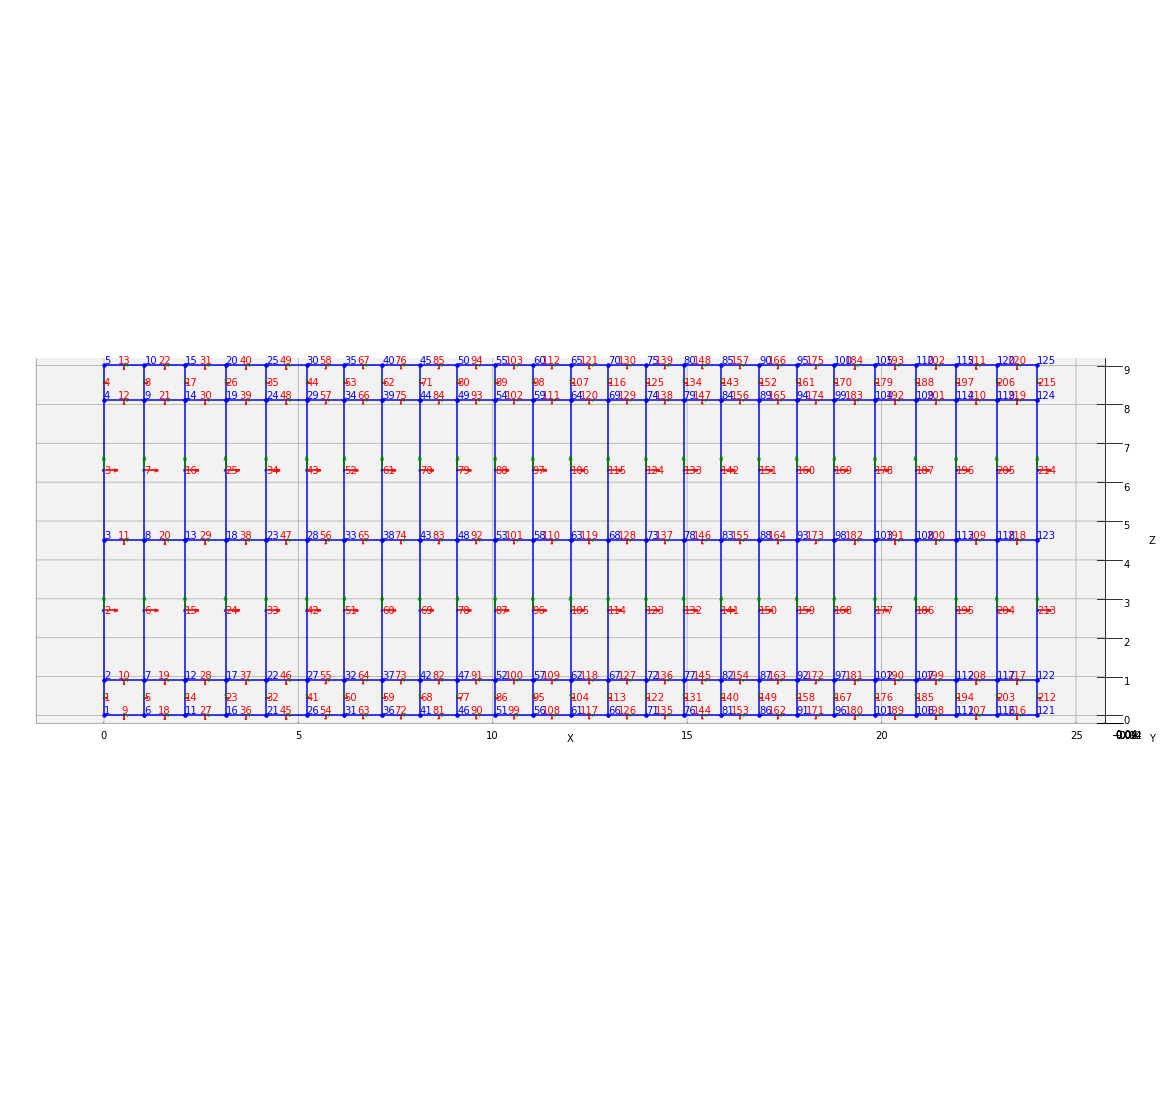

In [7]:
# assign grillage member to element groups of grillage model
variant_one_model.set_member(longitudinal_beam, member="interior_main_beam")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_1")
variant_one_model.set_member(longitudinal_beam, member="exterior_main_beam_2")
variant_one_model.set_member(edge_longitudinal_beam, member="edge_beam")
variant_one_model.set_member(transverse_slab, member="transverse_slab")
variant_one_model.set_member(end_transverse_slab, member="start_edge")
variant_one_model.set_member(end_transverse_slab, member="end_edge")
#sn3615.set_member(stich_slab, member="stitch_elements")

variant_one_model.create_osp_model(pyfile=False)
og.opsv.plot_model(element_labels=1, az_el=(-90, 0), fig_wi_he=(45., 45.))  # plotting using ops_vis
og.plt.show()

In [8]:
# # reference unit load for various load types
# P = 200 * kN
# # name strings of load cases to be created
# static_cases_names = [
#     "Line Test Case",
#     "Points Test Case (Global)",
#     "Points Test Case (Local in Point)",
#     "Patch Test Case",
# ]

# # Line load running along midspan width (P is kN/m)
# # Create vertical load points in global coordinate system
# line_point_1 = og.create_load_vertex(x=L / 2, z=0, p=P)
# line_point_2 = og.create_load_vertex(x=L / 2, z=w, p=P)
# test_line_load = og.create_load(
#     loadtype="line",name="Test Load", point1=line_point_1, point2=line_point_2,
# )

# # Create load case, add loads, and assign
# line_case = og.create_load_case(name=static_cases_names[0])
# line_case.add_load(test_line_load)

# variant_one_model.add_load_case(line_case)
# # variant_one_model.analyze()

# # results = variant_one_model.get_results()
# # force_array = results.forces
# # moment = force_array.sel(Component='Mz_i')

# # #print(moment)

In [9]:
# # Compound point loads along midspan width (P is kN)
# # working in global coordinate system
# p_list = [
#     0,
#     edge_dist,
#     edge_dist + 2.4 * m,
#     edge_dist + 4.8 * m,
#     #edge_dist + 6 * m,
#     w - edge_dist,
#     w,
# ]  # creating list of load position

# test_points_load = og.create_compound_load(name="Points Test Case (Global)")

# # create point load in global coordinate
# for p in p_list:
#     point = og.create_load(
#        loadtype = "point", name ="Point", point1=og.create_load_vertex(x=L / 2, z=p, p=P)
#     )
#     # add to compound load
#     test_points_load.add_load(load_obj=point)

# # Create load case, add loads, and assign
# points_case = og.create_load_case(name=static_cases_names[1])
# points_case.add_load(test_points_load)

# variant_one_model.add_load_case(points_case)

In [10]:
# # Compound point loads along midspan width
# # working in user-defined local coordinate (in point load)
# test_points_load = og.create_compound_load(name="Points Test Case (Local in Point)")

# # create point load in local coordinate space
# for p in p_list:
#     point = og.create_load(
#         loadtype="point",name="Point", point1=og.create_load_vertex(x=0, z=p, p=P)
#     )
#     # add to compound load
#     test_points_load.add_load(load_obj=point)

# # shift from local to global
# test_points_load.set_global_coord(og.Point(L / 2, 0, 0))

# # Create load case, add loads, and assign
# points_case = og.create_load_case(name=static_cases_names[2])
# points_case.add_load(test_points_load)

# variant_one_model.add_load_case(points_case)

In [11]:
# # Patch load over entire bridge deck (P is kN/m2)
# patch_point_1 = og.create_load_vertex(x=0, z=0, p=P)
# patch_point_2 = og.create_load_vertex(x=L, z=0, p=P)
# patch_point_3 = og.create_load_vertex(x=L, z=w, p=P)
# patch_point_4 = og.create_load_vertex(x=0, z=w, p=P)
# test_patch_load = og.create_load(
#     loadtype="patch",
#     name="Test Load",
#     point1=patch_point_1,
#     point2=patch_point_2,
#     point3=patch_point_3,
#     point4=patch_point_4,
# )

# # Create load case, add loads, and assign
# patch_case = og.create_load_case(name=static_cases_names[3])
# patch_case.add_load(test_patch_load)
# variant_one_model.add_load_case(patch_case)

In [12]:
# variant_one_model.analyze()
# all_result = variant_one_model.get_results() # this extracts all results
# #patch_result = variant_one_model.get_results(load_case = static_cases_names[1]) # this extracts only the patch load case results

In [13]:
# # get list of longitudinal element tags along/near mid_span i.e. 84 to 90 in Figure 1
# ele_set = list(range(21, 25 + 1))
# # query
# extracted_bending = all_result.forces.sel(Loadcase=['Points Test Case (Local in Point)'], Element=ele_set, Component="Mz_i")

In [14]:
# sum_bending = np.sum(extracted_bending[0])

In [15]:
#og.plot_defo(variant_one_model, all_result, member="exterior_main_beam_2", option= "nodes")

In [16]:
#og.plot_force(variant_one_model,all_result, member="exterior_main_beam_2", component="Mz" ,loadcase = ['Points Test Case (Local in Point)'])


In [17]:
# l_factor = 2.3
# p_factor = 0.5
# # combination with line load case and patch load case
# load_combinations = {static_cases_names[0]:l_factor,static_cases_names[-1]:p_factor}
# combination_results = variant_one_model.get_results(combinations=load_combinations)

In [18]:
# np.sum(
# np.array(
#     all_result.forces.sel(
#         Loadcase=static_cases_names, Element=ele_set, Component="Mz_i"
#     )
# ),
# axis=1,
# )

In [19]:
# sum_node_force = np.sum(
#     np.array(combination_results.forces.sel(Element=ele_set, Component="Mz_i"))
# )

In [20]:
# #moving load
# # 2 axle truck (equal loads, 2x2 spacing centre line running)
# axl_w = 2 * m  # axle width
# axl_s = 2 * m  # axle spacing
# veh_l = axl_s  # vehicle length
# # create truck in local coordinate system
# two_axle_truck = og.create_compound_load(name="Two Axle Truck")
# # note here we show that we can directly interact and create load vertex using LoadPoint namedtuple instead of create_load_vertex()
# point1 = og.create_load(
#     loadtype = "point", name="Point", point1=og.LoadPoint(x=0, y=0, z=0, p=P)
# )
# point2 = og.create_load(
#     loadtype = "point",name="Point", point1=og.LoadPoint(x=0, y=0, z=axl_w, p=P)
# )
# point3 = og.create_load(
#     loadtype ="point",name="Point", point1=og.LoadPoint(x=axl_s, y=0, z=axl_w, p=P)
# )
# point4 = og.create_load(
#     loadtype ="point",name="Point", point1=og.LoadPoint(x=axl_s, y=0, z=0, p=P)
# )

# two_axle_truck.add_load(load_obj=point1)
# two_axle_truck.add_load(load_obj=point2)
# two_axle_truck.add_load(load_obj=point3)
# two_axle_truck.add_load(load_obj=point4)

# # create path object in global coordinate system - centre line running of entire span
# # when local coord: the path describes where the moving load *origin* is to start and end
# single_path = og.create_moving_path(
#     start_point=og.Point(0 - axl_w, 0, w / 2 - axl_w / 2),
#     end_point=og.Point(L, 0, w / 2 - axl_w / 2),
#     increments=int(np.round(L) + veh_l + 1),
# )

# # create moving load (and case)
# moving_truck = og.create_moving_load(name="Moving Two Axle Truck")

# # Set path to all loads defined within moving_truck
# moving_truck.set_path(single_path)
# # note: it is possible to set different paths for different compound loads in one moving load object
# moving_truck.add_load(two_axle_truck)

# # Assign
# variant_one_model.add_load_case(moving_truck)

In [21]:
# variant_one_model.analyze()
# move_results = variant_one_model.get_results(load_case="Moving Two Axle Truck")
# # selecting load case of specific load position
# integer = int(
#     L / 2 - 1 + 2
# )  # here we choose when the load groups are at/near mid span L = 14m i.e. 17

# # query
# mid_span_bending = move_results.forces.isel(Loadcase=integer).sel(
#     Element=ele_set, Component="Mz_i"
# )

In [22]:
# bending_z = np.sum(np.array(mid_span_bending))

# # Hand calc:
# bending_z_theoretical = 2 * P * (L / 2 - axl_s / 2)  # 31500

# print("bending_z ={}".format(bending_z))
# print("bending_z_theoretical ={}".format(bending_z_theoretical))

In [23]:
# Compound point loads along midspan width (P is kN)
# working in global coordinate system
P = 100 * kN

# p_list = [
#     0,
#     edge_dist,
#     edge_dist + 2.4 * m,
#     #edge_dist + 4.8 * m,
#     #edge_dist + 6 * m,
#     w - edge_dist,
#     w,
# ]  # creating list of load position

p_list = [
    0,
    0+ 2.25 *m,
    0+ 2.25 *m + 2.25 *m,
    #edge_dist + 4.8 * m,
    #edge_dist + 6 * m,
    0+ 2.25 *m + 2.25 *m +2.25*m,
    w,
]  # creating list of load position

test_points_load = og.create_compound_load(name="Test 100kn")

# create point load in global coordinate
for p in p_list:
    point = og.create_load(
       loadtype = "point", name ="Point7", point1=og.create_load_vertex(x= 11.478 * m, z=p, p=P)
    )
    test_points_load.add_load(load_obj=point)
    
    # point_2 = og.create_load(
    #    loadtype = "point", name ="Point17", point1=og.create_load_vertex(x= 17 * m, z=p, p=P)
    # )
     

    # add to compound load
    # test_points_load.add_load(load_obj=point_2)
# Create load case, add loads, and assign
points_case = og.create_load_case(name="Test")
points_case.add_load(test_points_load)

variant_one_model.add_load_case(points_case)

In [24]:
variant_one_model.analyze()
results = variant_one_model.get_results()
force_array = results.forces
moment = force_array.sel(Component='Mz_i')

#print(moment)

In [25]:
# ele_set_4m = [161,714, 690,666,148]
# ele_set_7m = [72, 73, 74, 75, 76]
# ele_set_17m = [162, 163, 164 , 165,166]
# ele_set_20m = [593,730,706,682,580]

# extracted_bending_17m = results.forces.sel(Loadcase=['Test'], Element= ele_set_17m , Component="Mz_i")
# extracted_bending_7m = results.forces.sel(Loadcase=['Test'], Element= ele_set_7m , Component="Mz_i")
# # extracted_bending_4m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_4m , Component="Mz_i")
# # extracted_bending_20m = results.forces_beam.sel(Loadcase=['Test'], Element= ele_set_20m , Component="Mz_i")

In [26]:
exterior_1 = variant_one_model.get_element(member="exterior_main_beam_1", options="elements")
exterior_2 = variant_one_model.get_element(member="exterior_main_beam_2", options="elements")
interior = variant_one_model.get_element(member="interior_main_beam", options="elements")
edge_1 = variant_one_model.get_element(member="edge_beam", options="elements", z_group_num=0)
edge_2 = variant_one_model.get_element(member="edge_beam", options="elements", z_group_num=1)

extracted_bending_exterior_1 = results.forces.sel(Loadcase=['Test'], Element= exterior_1 , Component="Mz_i")
extracted_bending_exterior_2 = results.forces.sel(Loadcase=['Test'], Element= exterior_2 , Component="Mz_i")
extracted_bending_interior = results.forces.sel(Loadcase=['Test'], Element= interior , Component="Mz_i")
extracted_bending_edge1 = results.forces.sel(Loadcase=['Test'], Element= edge_1 , Component="Mz_i")
extracted_bending_edge2 = results.forces.sel(Loadcase=['Test'], Element= edge_2 , Component="Mz_i")

In [27]:
extracted_bending_interior

<xarray.DataArray 'forces' (Loadcase: 1, Element: 24)>
array([[1999.7266170645707, -37445.16078947109, -76609.26915299158,
        -115768.27290377137, -155100.9712542419, -190234.43954475,
        -119390.92020945667, -47784.06987125993, 23755.701358514067,
        95036.1918032591, 166270.77142854378, 245004.34851409958,
        250081.92259314883, 187969.7310571643, 127246.51208021949,
        66838.97013013372, 6533.38896704563, -53800.78837962117,
        -114199.21534457427, -170079.54566608634, -137296.7129912216,
        -103702.84825860357, -70065.92203265737, -36210.85750983528]],
      dtype=object)
Coordinates:
    Component  <U7 'Mz_i'
  * Loadcase   (Loadcase) <U4 'Test'
  * Element    (Element) int32 11 20 29 38 47 56 65 ... 173 182 191 200 209 218

In [28]:
ele_array = results.ele_nodes

In [29]:
sum = (extracted_bending_interior.values[0] + extracted_bending_exterior_1.values[0]+ extracted_bending_exterior_2.values[0] + extracted_bending_edge1.values[0]+ extracted_bending_edge2.values[0])/1000

In [30]:
print(sum)

[5.775291356258094e-13 -140.70155631066467 -281.4031126213284
 -422.1046689320005 -562.8062252426613 -703.5077815533215
 -437.45523139997977 -171.4026812466366 94.64986890673157
 360.70241906004577 626.7549692133288 892.8075193666239 897.8600695198844
 679.4126196731567 460.96516982632147 242.51771997951764
 24.070270132714324 -194.3771797140968 -412.8246295608754
 -631.2720794076708 -505.0176635261445 -378.76324764461305
 -252.5088317630766 -126.25441588153801]


In [31]:
# og.plot_force(variant_one_model, results, member="exterior_main_beam_2", component="Mz")
og.plot_force(sum)

Missing argument member=


c:\users\sokunthervy vann\cloneospgillage\ospgrillage\ospgrillage\postprocessing.py:299: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


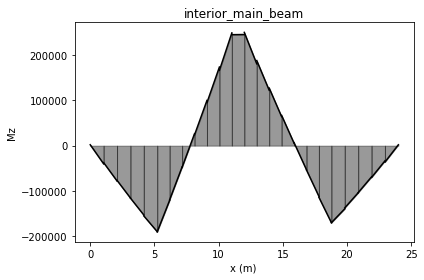

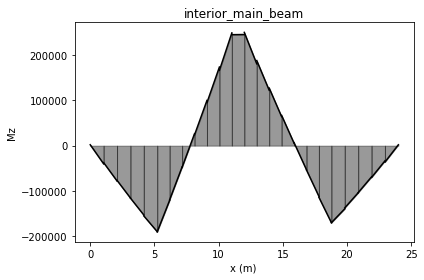

In [32]:
og.plot_force(variant_one_model, results, member="interior_main_beam", component="Mz")

In [33]:
#axle weight 
P = 6*9.81 *kN
# 2 axle truck (equal loads, 2x2 spacing centre line running)
axl_w = 2 * m  # axle width
axl_s = 2 * m  # axle spacing
veh_l = axl_s  # vehicle length
# create truck in local coordinate system
two_axle_truck = og.create_compound_load(name="Two Axle Truck")
# note here we show that we can directly interact and create load vertex using LoadPoint namedtuple instead of create_load_vertex()
point1 = og.create_load(
    name="Point", point1=og.LoadPoint(x=0, y=0, z=0, p=P)
)
point2 = og.create_load(
    name="Point", point1=og.LoadPoint(x=0, y=0, z=axl_w, p=P)
)
point3 = og.create_load(
    name="Point", point1=og.LoadPoint(x=axl_s, y=0, z=axl_w, p=P)
)
point4 = og.create_load(
    name="Point", point1=og.LoadPoint(x=axl_s, y=0, z=0, p=P)
)

two_axle_truck.add_load(load_obj=point1)
two_axle_truck.add_load(load_obj=point2)
two_axle_truck.add_load(load_obj=point3)
two_axle_truck.add_load(load_obj=point4)

# create path object in global coordinate system - centre line running of entire span
# when local coord: the path describes where the moving load *origin* is to start and end
single_path = og.create_moving_path(
    start_point=og.Point(0 - axl_w, 0, w / 2 - axl_w / 2),
    # start_point=og.Point(0, 0, w / 2 - axl_w / 2),
    end_point=og.Point(L, 0, w / 2 - axl_w / 2),
    increments=int(np.round(L) + veh_l + 1),
)

# create moving load (and case)
moving_truck = og.create_moving_load(name="Moving Two Axle Truck")

# Set path to all loads defined within moving_truck
moving_truck.set_path(single_path)
# note: it is possible to set different paths for different compound loads in one moving load object
moving_truck.add_load(two_axle_truck)

# Assign
variant_one_model.add_load_case(moving_truck)

In [34]:
move_results = variant_one_model.get_results(load_case="Moving Two Axle Truck")

KeyError: 'Moving Two Axle Truck at global position [-2.00,0.00,3.50]'

In [ ]:

extracted_bending_exterior_1 = results.forces.sel(Loadcase=["Moving Two Axle Truck"], Element= exterior_1 , Component="Mz_i")
extracted_bending_exterior_2 = results.forces.sel(Loadcase=["Moving Two Axle Truck"], Element= exterior_2 , Component="Mz_i")
extracted_bending_interior = results.forces.sel(Loadcase=["Moving Two Axle Truck"], Element= interior , Component="Mz_i")
extracted_bending_edge1 = results.forces.sel(Loadcase=["Moving Two Axle Truck"], Element= edge_1 , Component="Mz_i")
extracted_bending_edge2 = results.forces.sel(Loadcase=["Moving Two Axle Truck"], Element= edge_2 , Component="Mz_i")